In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [22]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
data = torch.tensor( iris[iris.columns[0:4]].values ).float()
target = torch.zeros(len(data), dtype=torch.long)
target = torch.zeros(len(data), dtype=torch.long)
target[iris.species=='versicolor'] = 1
target[iris.species=='virginica'] = 2

In [24]:
def create_model(hidden_units:int):

    model = nn.Sequential(
        nn.Linear(4,hidden_units),   
        nn.ReLU(),         
        nn.Linear(hidden_units,hidden_units),  
        nn.ReLU(),         
        nn.Linear(hidden_units,3),  
        # nn.Softmax(dim=1)
          )

    # loss function
    lossfun = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(model.parameters(),lr=.01)
    return model, lossfun, optimizer

In [25]:
def train_model(model,lossfun,optimizer):
    epochs = 200
    losses = torch.zeros(epochs)
    # acc_by_epoch=[]
    
    for i in range(epochs):
    
        #forward
        y_hat = model(data)
    
        #loss computing
        loss = lossfun(y_hat, target)
        losses[i] = loss
    
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        
        # bool to extract if the guess was correct
        matches = torch.argmax(y_hat, axis=1) == target
        matchesNUM = matches.float()
        accuracy = 100*torch.mean(matchesNUM)
        # acc_by_epoch.append( accuracy )        
    
    # it does not matter 
    predictions_1 = torch.argmax(y_hat, axis=1)
    
    # predictions = model(data)
    # predictions_2 = torch.argmax(predictions,axis=1)
    predictions = model(data)
    
    predlabels = torch.argmax(predictions,axis=1)
    return 100*torch.mean((predlabels==target).float())
    # totalacc = 100*torch.mean((predictions_1 == target).float())

    # return totalacc


In [26]:
# create hidden units vector
units = np.arange(4,129,4)
units = list(range(4,129,4))
acc_by_unit_count = []

In [27]:
for unitsi in units:
    model, lossfun, optimizer = create_model(unitsi)
    acc_per_unit_count = train_model(model, lossfun, optimizer)
    acc_by_unit_count.append(acc_per_unit_count)
    
    

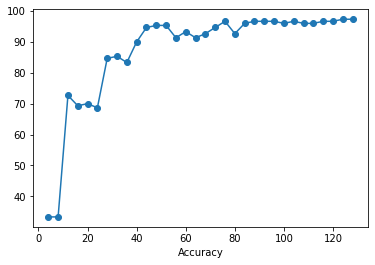

In [33]:
plt.plot(units,acc_by_unit_count,'o-')
plt.xlabel("Hidden units")
plt.xlabel("Accuracy")
plt.show()

In [35]:
print(min(acc_by_unit_count))
print(max(acc_by_unit_count))


tensor(33.3333)
tensor(97.3333)


Observation: The more hidden units, the more complex the model. But from the other side, the more hidden units, the more likely the model will overfit.
